In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=2.5,
                rc={"lines.linewidth": 2.5})
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('Attrition_dummy.csv')
data.drop(columns = ['Unnamed: 0'], inplace=True)
data.head()

,Attrition,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,...,cat_JobInvolvement_2,cat_JobInvolvement_3,cat_JobInvolvement_4,cat_MaritalStatus_0,cat_MaritalStatus_1,cat_MaritalStatus_2,cat_StockOptionLevel_0,cat_StockOptionLevel_1,cat_StockOptionLevel_2,cat_StockOptionLevel_3
0,0,41,1102,1,2,0,94,2,0,4,...,0,1,0,1,0,0,1,0,0,0
1,1,49,279,8,3,1,61,2,1,2,...,1,0,0,0,1,0,0,1,0,0
2,0,37,1373,2,4,1,92,1,2,3,...,1,0,0,1,0,0,1,0,0,0
3,1,33,1392,3,4,0,56,1,1,3,...,0,1,0,0,1,0,1,0,0,0
4,1,27,591,2,1,1,40,1,2,2,...,0,1,0,0,1,0,0,1,0,0


In [3]:
data.shape

(1470, 52)

In [4]:
data["Attrition"].value_counts()

1    1233
0     237
Name: Attrition, dtype: int64

### Imbalance learn

In [5]:
from imblearn.datasets import make_imbalance
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [6]:
y = data[['Attrition']]
X = data.drop(columns = ['Attrition'])

In [7]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[('Attrition', 1)]


In [8]:
print(y_resampled.shape)
print(X_resampled.shape)

(2466, 1)
(2466, 51)


In [9]:
y_resampled['Attrition'].value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

### Nuevo dataframe balanceado

In [10]:
df = pd.concat([y_resampled, X_resampled], axis=1)
df.head()

,Attrition,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,...,cat_JobInvolvement_2,cat_JobInvolvement_3,cat_JobInvolvement_4,cat_MaritalStatus_0,cat_MaritalStatus_1,cat_MaritalStatus_2,cat_StockOptionLevel_0,cat_StockOptionLevel_1,cat_StockOptionLevel_2,cat_StockOptionLevel_3
0,0,41,1102,1,2,0,94,2,0,4,...,0,1,0,1,0,0,1,0,0,0
1,1,49,279,8,3,1,61,2,1,2,...,1,0,0,0,1,0,0,1,0,0
2,0,37,1373,2,4,1,92,1,2,3,...,1,0,0,1,0,0,1,0,0,0
3,1,33,1392,3,4,0,56,1,1,3,...,0,1,0,0,1,0,1,0,0,0
4,1,27,591,2,1,1,40,1,2,2,...,0,1,0,0,1,0,0,1,0,0


In [11]:
df.shape

(2466, 52)

### Separación de los datos

In [12]:
test_size = 0.4
df_train, df_test = train_test_split(df, test_size=test_size, random_state=42)

In [13]:
df_validate, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [14]:
print(len(df_train), len(df_test), len(df_validate))

1479 494 493


### Estandarización datos

In [15]:
X_train = df_train.drop("Attrition", axis = 1)
y_train = df_train["Attrition"]
X_test = df_test.drop("Attrition", axis = 1)
y_test = df_test["Attrition"]
X_validate = df_validate.drop("Attrition", axis = 1)
y_validate = df_validate["Attrition"]

In [16]:
col_names = X_train.columns.values.tolist()

In [17]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', SimpleImputer(strategy='median'))
])

col_transformer = ColumnTransformer(transformers=[
    ('num', num_pipeline, col_names)
])

In [18]:
col_transformer.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True)),
                                                 ('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                      

In [19]:
X_trained_scaled = pd.DataFrame(col_transformer.transform(X_train), index=X_train.index, columns = col_names)
X_test_scaled = pd.DataFrame(col_transformer.transform(X_test), index=X_test.index, columns = col_names)
X_validate_scaled = pd.DataFrame(col_transformer.transform(X_validate), index=X_validate.index, columns = col_names)

In [20]:
X_trained_scaled.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,...,cat_JobInvolvement_2,cat_JobInvolvement_3,cat_JobInvolvement_4,cat_MaritalStatus_0,cat_MaritalStatus_1,cat_MaritalStatus_2,cat_StockOptionLevel_0,cat_StockOptionLevel_1,cat_StockOptionLevel_2,cat_StockOptionLevel_3
2063,1.627219,0.899769,-0.202243,-1.419183,0.798670,-0.655822,1.023474,0.229907,1.244618,1.077110,...,-0.633952,-1.103355,-0.305166,1.217187,-0.829672,-0.483247,0.962175,-0.722222,-0.288992,-0.254548
159,-0.152775,-1.178146,-0.933582,0.346885,-1.252082,0.425407,-0.814678,1.544465,0.348420,-0.796955,...,-0.633952,0.906327,-0.305166,-0.821567,1.205295,-0.483247,-1.039312,1.384615,-0.288992,-0.254548
2209,-0.676303,0.301173,0.041536,1.229919,-1.252082,1.260902,-0.814678,-0.646465,-1.443975,-0.758445,...,1.577405,-1.103355,-0.305166,1.217187,-0.829672,-0.483247,0.962175,-0.722222,-0.288992,-0.254548
1116,2.046041,-0.240999,1.991773,0.346885,0.798670,-0.311795,2.861625,1.106279,1.244618,3.066260,...,1.577405,-1.103355,-0.305166,-0.821567,1.205295,-0.483247,-1.039312,1.384615,-0.288992,-0.254548
2177,0.580164,0.740307,-0.933582,-0.536149,-1.252082,-0.459235,-0.814678,-0.208279,1.244618,-0.675193,...,-0.633952,-1.103355,-0.305166,-0.821567,-0.829672,2.069334,-1.039312,1.384615,-0.288992,-0.254548


In [21]:
X_test_scaled.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,...,cat_JobInvolvement_2,cat_JobInvolvement_3,cat_JobInvolvement_4,cat_MaritalStatus_0,cat_MaritalStatus_1,cat_MaritalStatus_2,cat_StockOptionLevel_0,cat_StockOptionLevel_1,cat_StockOptionLevel_2,cat_StockOptionLevel_3
2450,0.370752,0.274187,-0.567912,1.229919,0.798670,-0.508382,0.104398,1.544465,1.244618,-0.829232,...,-0.633952,0.906327,-0.305166,-0.821567,1.205295,-0.483247,-1.039312,1.384615,-0.288992,-0.254548
1769,-0.676303,0.512153,-1.055471,0.346885,0.798670,0.916875,-0.814678,-0.646465,0.348420,-0.835465,...,-0.633952,0.906327,-0.305166,1.217187,-0.829672,-0.483247,0.962175,-0.722222,-0.288992,-0.254548
1244,-0.571597,1.297198,-0.933582,1.229919,-1.252082,0.572847,-0.814678,-0.646465,-1.443975,-0.187700,...,1.577405,-1.103355,-0.305166,1.217187,-0.829672,-0.483247,0.962175,-0.722222,-0.288992,-0.254548
1414,1.208397,0.973367,1.869883,-1.419183,0.798670,0.867728,1.023474,0.668093,0.348420,0.628127,...,-0.633952,0.906327,-0.305166,1.217187,-0.829672,-0.483247,0.962175,-0.722222,-0.288992,-0.254548
838,0.684869,-0.741465,0.285316,0.346885,0.798670,-1.098143,1.942550,-1.084651,-1.443975,1.768950,...,-0.633952,0.906327,-0.305166,1.217187,-0.829672,-0.483247,0.962175,-0.722222,-0.288992,-0.254548


In [22]:
X_validate_scaled.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,Gender,HourlyRate,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,...,cat_JobInvolvement_2,cat_JobInvolvement_3,cat_JobInvolvement_4,cat_MaritalStatus_0,cat_MaritalStatus_1,cat_MaritalStatus_2,cat_StockOptionLevel_0,cat_StockOptionLevel_1,cat_StockOptionLevel_2,cat_StockOptionLevel_3
1798,-0.676303,0.276640,1.016655,0.346885,0.798670,0.966021,-0.814678,-0.646465,1.244618,-0.761784,...,1.577405,-1.103355,-0.305166,1.217187,-0.829672,-0.483247,0.962175,-0.722222,-0.288992,-0.254548
1538,-1.618653,1.419861,0.041536,1.229919,0.798670,-1.687904,-0.814678,-0.646465,0.348420,-1.068972,...,-0.633952,0.906327,-0.305166,1.217187,-0.829672,-0.483247,0.962175,-0.722222,-0.288992,-0.254548
1330,0.789575,0.097552,-0.446023,-1.419183,-1.252082,0.720288,2.861625,1.106279,0.348420,3.023076,...,1.577405,-1.103355,-0.305166,-0.821567,1.205295,-0.483247,0.962175,-0.722222,-0.288992,-0.254548
1624,-1.409242,-0.962259,-0.324133,1.229919,0.798670,0.425407,-0.814678,-0.646465,-0.547777,-0.743308,...,-0.633952,0.906327,-0.305166,1.217187,-0.829672,-0.483247,0.962175,-0.722222,-0.288992,-0.254548
2418,0.580164,-1.570668,-0.689802,-1.419183,0.798670,-0.508382,0.104398,-1.084651,-0.547777,0.788844,...,-0.633952,0.906327,-0.305166,1.217187,-0.829672,-0.483247,0.962175,-0.722222,-0.288992,-0.254548


### Feature selection

In [23]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.feature_selection import SelectFromModel

In [24]:
sel = RFECV(estimator=LogisticRegression(solver='liblinear'), cv=5, scoring='accuracy')
sel.fit(X_trained_scaled, y_train)

RFECV(cv=5,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='liblinear', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [25]:
# let's add the variable names and order it for clearer visualisation
selected_feat = X_trained_scaled.columns[(sel.get_support())]
len(selected_feat)

26

In [26]:
# let's display the list of features
selected_feat

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Gender',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'cat_BusinessTravel_1', 'cat_BusinessTravel_2', 'cat_Department_0',
       'cat_EducationField_4', 'cat_JobInvolvement_1', 'cat_JobInvolvement_4',
       'cat_MaritalStatus_0', 'cat_MaritalStatus_2', 'cat_StockOptionLevel_0'],
      dtype='object')

### GridSearch - Modelos clasificación

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
import datetime as dt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import neighbors
from sklearn.gaussian_process import GaussianProcessClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, auc,roc_auc_score, classification_report, f1_score



C:\Users\Juan Camilo Ceballos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [28]:
models = {
            'linear' : {
                    'mod' : LogisticRegression(solver = 'saga'),
                    'par' : {'penalty' : ('l1','l2','elasticnet','none'),
                                'C': [1,1.5,2],
                            'l1_ratio':[0.2,0.5,0.8]}
                    },                     
            'gradient' : {
                    'mod' : GradientBoostingClassifier(warm_start = True),
                    'par' : {'loss' : ('deviance', 'exponential'),
                             'max_depth' : [3, 4, 5, 6, 7]}
                        },
           'tree':{'mod': DecisionTreeClassifier(),
                     'par':{'splitter':('best','random'),
                            'max_depth': [None, 2,4,6],
                            'min_samples_leaf':[1,5,8]}},
            'svm' : {
                    'mod' : svm.SVC(probability=True),
                    'par' : {'kernel' : ( 'linear', 'rbf')}
                    },
        'RandomForest' : {
                    'mod' : RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4, criterion = 'gini'),
                    'par' : {'max_depth' :[None, 2,4,6],
                            'min_samples_leaf':[1,5,8]}
                        },
        'Knn' : {
                    'mod' : neighbors.KNeighborsClassifier(),
                    'par' : {'n_neighbors' :[5, 10, 15],
                            'leaf_size':[15,25,30]}
                        },
        'GCP' : {
                    'mod' : GaussianProcessClassifier(),
                    'par' : {'optimizer' :['fmin_l_bfgs_b'],
                            }
                        }  
    
        }



In [29]:
def grid(x_name,n_proc, os_X_tt, os_Y_tt, X_test, y_test,  models, score = 'roc_auc', cv = 5):
    
    # Gridsearch
    
    result = dict()
    bestmodels = models.copy()
    for name in models:
        print('*'*80)
        print("Model: " + name)
        t_beg = time.time()

        pipeline = Pipeline([(name,  bestmodels[name]['mod'])])          
        parameters = {}          
        for par in bestmodels[name]['par']:
            aux = name + '__' +  par
            parameters[aux] = bestmodels[name]['par'][par]    
        aux = GridSearchCV(pipeline, parameters, n_jobs = n_proc,\
                          scoring = score, verbose=2, cv = cv)
        
        print(os_X_tt.columns.values)
        
        aux.fit(os_X_tt, os_Y_tt)
        y_true, y_pred = y_test , aux.predict(X_test)
        
        precision = precision_score(y_test, y_pred, average="macro")
        recall = recall_score(y_test, y_pred, average="macro")  
        auc = roc_auc_score(y_test, y_pred, average="macro")
        f1score = f1_score(y_test, y_pred, average="macro")
        
        
        bestmodels[name]['bestModel'] = aux.best_estimator_
        bestmodels[name][score] = aux.best_score_
        bestmodels[name]['cols_order'] = os_X_tt.columns.values
        selection_time = time.time() - t_beg

        bestmodels[name]['selection_time'] = selection_time

        sample_f_path = f'modelos/{x_name}' + f'{name}_{dt.datetime.now().strftime("%Y%m%d-%H%M")}.sav'

        print(f"Saving model at {sample_f_path}")    
        joblib.dump(bestmodels[name]['bestModel'], sample_f_path)

        print(f"El tiempo de seleccion fue: {selection_time:0.3f} s")
        print(f"El error {score} de la familia {name} es: {bestmodels[name][score]:0.3f}")
        print('*'*80)
    
        result[name] = {"auc": round(auc,3), "precision": round(precision,3), "recall": round(recall,3),"f1score": round(f1score,3)}
        
        
    mod_name = None
    best_mae = -np.inf
    for name in models:
        if bestmodels[name][score] > best_mae:
            mod_name = name
            best_mae = bestmodels[name][score]

    print(f"best model: " + mod_name + f" with an error {score} of: " + str(best_mae))
    
    return bestmodels, result

In [30]:
#Bestmodels

def get_max(dictionary, key_val):
    auc_list = []
    auc_dict = {}

    for key in dictionary:
        for key2 in dictionary[key]:
            if key_val in key2:
                auc_list.append(dictionary[key][key_val])

    max_key = ''
    max_val = max(auc_list)

    for key in dictionary:
        for key2 in dictionary[key]:
            if max_val == dictionary[key][key_val]:
                max_key = key
                
    return max_key, max_val

In [31]:
# variables seleccionadas
X1_train= X_trained_scaled[selected_feat]
X1_test = X_test_scaled[selected_feat]
X1_validate = X_validate_scaled[selected_feat]


In [32]:
Bestmodels_X1, result_X1  = grid('X1', -1, X1_train, y_train.values, X1_test, y_test, models, score = 'roc_auc', cv = 5)

********************************************************************************
Model: linear
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'PercentSalaryHike' 'RelationshipSatisfaction' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'cat_BusinessTravel_1' 'cat_BusinessTravel_2' 'cat_Department_0'
 'cat_EducationField_4' 'cat_JobInvolvement_1' 'cat_JobInvolvement_4'
 'cat_MaritalStatus_0' 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0']
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    7.5s finished


Saving model at modelos/X1linear_20200417-2053.sav
El tiempo de seleccion fue: 7.644 s
El error roc_auc de la familia linear es: 0.855
********************************************************************************
********************************************************************************
Model: gradient
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'PercentSalaryHike' 'RelationshipSatisfaction' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'cat_BusinessTravel_1' 'cat_BusinessTravel_2' 'cat_Department_0'
 'cat_EducationField_4' 'cat_JobInvolvement_1' 'cat_JobInvolvement_4'
 'cat_MaritalStatus_0' 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0']
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.0s finished


Saving model at modelos/X1gradient_20200417-2054.sav
El tiempo de seleccion fue: 21.868 s
El error roc_auc de la familia gradient es: 0.979
********************************************************************************
********************************************************************************
Model: tree
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'PercentSalaryHike' 'RelationshipSatisfaction' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'cat_BusinessTravel_1' 'cat_BusinessTravel_2' 'cat_Department_0'
 'cat_EducationField_4' 'cat_JobInvolvement_1' 'cat_JobInvolvement_4'
 'cat_MaritalStatus_0' 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0']
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.8s finished


Saving model at modelos/X1tree_20200417-2054.sav
El tiempo de seleccion fue: 5.423 s
El error roc_auc de la familia tree es: 0.876
********************************************************************************
********************************************************************************
Model: svm
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'PercentSalaryHike' 'RelationshipSatisfaction' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'cat_BusinessTravel_1' 'cat_BusinessTravel_2' 'cat_Department_0'
 'cat_EducationField_4' 'cat_JobInvolvement_1' 'cat_JobInvolvement_4'
 'cat_MaritalStatus_0' 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0']
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.1s finished


Saving model at modelos/X1svm_20200417-2054.sav
El tiempo de seleccion fue: 7.235 s
El error roc_auc de la familia svm es: 0.934
********************************************************************************
********************************************************************************
Model: RandomForest
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'PercentSalaryHike' 'RelationshipSatisfaction' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'cat_BusinessTravel_1' 'cat_BusinessTravel_2' 'cat_Department_0'
 'cat_EducationField_4' 'cat_JobInvolvement_1' 'cat_JobInvolvement_4'
 'cat_MaritalStatus_0' 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0']
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   28.6s finished


Saving model at modelos/X1RandomForest_20200417-2054.sav
El tiempo de seleccion fue: 30.780 s
El error roc_auc de la familia RandomForest es: 0.982
********************************************************************************
********************************************************************************
Model: Knn
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'PercentSalaryHike' 'RelationshipSatisfaction' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'cat_BusinessTravel_1' 'cat_BusinessTravel_2' 'cat_Department_0'
 'cat_EducationField_4' 'cat_JobInvolvement_1' 'cat_JobInvolvement_4'
 'cat_MaritalStatus_0' 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0']
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    5.4s finished


Saving model at modelos/X1Knn_20200417-2055.sav
El tiempo de seleccion fue: 6.282 s
El error roc_auc de la familia Knn es: 0.857
********************************************************************************
********************************************************************************
Model: GCP
['Age' 'DistanceFromHome' 'EnvironmentSatisfaction' 'Gender'
 'JobSatisfaction' 'MonthlyIncome' 'NumCompaniesWorked' 'OverTime'
 'PercentSalaryHike' 'RelationshipSatisfaction' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager'
 'cat_BusinessTravel_1' 'cat_BusinessTravel_2' 'cat_Department_0'
 'cat_EducationField_4' 'cat_JobInvolvement_1' 'cat_JobInvolvement_4'
 'cat_MaritalStatus_0' 'cat_MaritalStatus_2' 'cat_StockOptionLevel_0']
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.2s finished


Saving model at modelos/X1GCP_20200417-2055.sav
El tiempo de seleccion fue: 10.672 s
El error roc_auc de la familia GCP es: 0.966
********************************************************************************
best model: RandomForest with an error roc_auc of: 0.9824313463698161


<IPython.core.display.Javascript object>


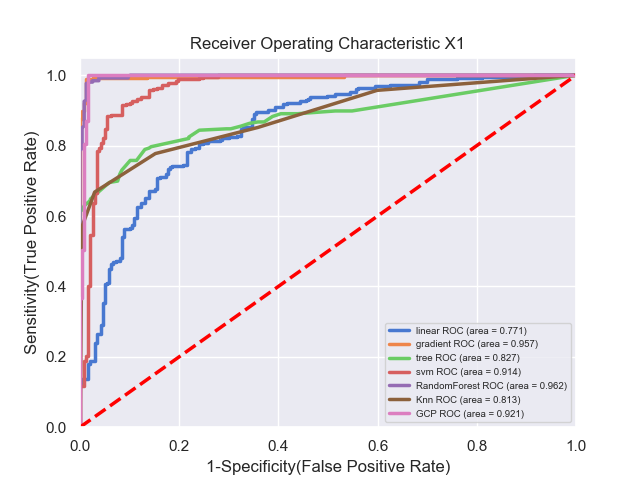

In [33]:
%matplotlib notebook
sns.set_context("notebook", font_scale=1.0,
                rc={"lines.linewidth": 2.5})
fig, ax = plt.subplots()
for m in Bestmodels_X1:
    model =Bestmodels_X1[m]['bestModel'] # select the model
#     y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_validate, model.predict_proba(X1_validate)[:,1])
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_validate,model.predict(X1_validate))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m, auc))
# Custom settings for the plot 


plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic X1')
plt.legend(loc="lower right", fontsize ='xx-small')
plt.show()   # Display
plt.savefig('Bestmodels_X1.png', facecolor=fig.get_facecolor(), bbox_inches='tight', xlabelsize=1)

In [34]:
result_X1

{'linear': {'auc': 0.768,
  'precision': 0.771,
  'recall': 0.768,
  'f1score': 0.767},
 'gradient': {'auc': 0.948,
  'precision': 0.948,
  'recall': 0.948,
  'f1score': 0.947},
 'tree': {'auc': 0.809, 'precision': 0.813, 'recall': 0.809, 'f1score': 0.807},
 'svm': {'auc': 0.887, 'precision': 0.887, 'recall': 0.887, 'f1score': 0.887},
 'RandomForest': {'auc': 0.956,
  'precision': 0.956,
  'recall': 0.956,
  'f1score': 0.955},
 'Knn': {'auc': 0.802, 'precision': 0.805, 'recall': 0.802, 'f1score': 0.801},
 'GCP': {'auc': 0.912, 'precision': 0.916, 'recall': 0.912, 'f1score': 0.911}}